# Import and show data

Imports

In [59]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
from collections import defaultdict, Counter
import random
import subprocess
import os
import imageio


H5py file

In [3]:
hf = h5py.File('all_patches.hdf5', 'r')

In [4]:
print("Keys: %s" % hf.keys())
a_group_key = list(hf.keys())[0]

data = list(hf[a_group_key])

Keys: KeysView(<HDF5 file "all_patches.hdf5" (mode r)>)


# Plot some malignant images

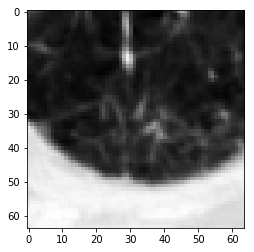

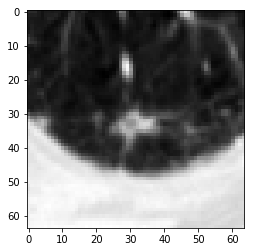

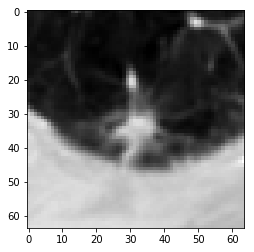

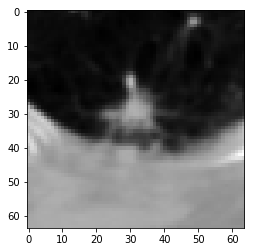

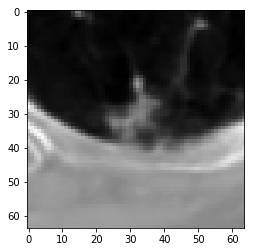

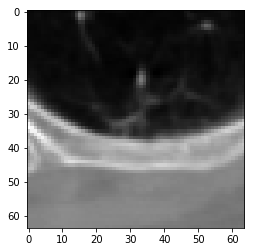

In [5]:
plt.figure()
plt.imshow(data[1]/255, cmap='gray')
plt.figure()
plt.imshow(data[2]/255, cmap='gray')
plt.figure()
plt.imshow(data[3]/255, cmap='gray')
plt.figure()
plt.imshow(data[4]/255, cmap='gray')
plt.figure()
plt.imshow(data[5]/255, cmap='gray')
plt.figure()
plt.imshow(data[6]/255, cmap='gray')

# Plot some good images

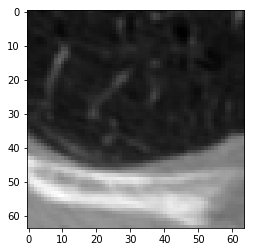

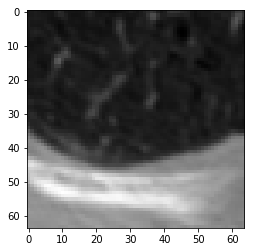

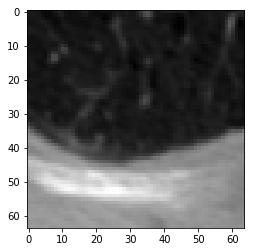

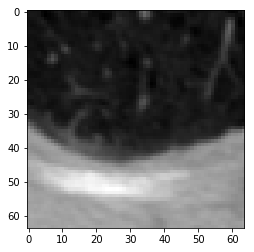

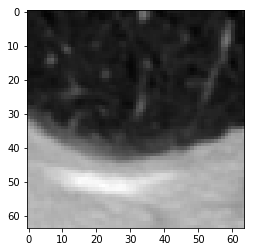

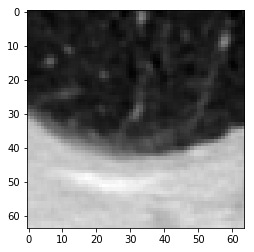

In [6]:
plt.figure()
plt.imshow(data[6000]/255, cmap='gray')
plt.figure()
plt.imshow(data[6001]/255, cmap='gray')
plt.figure()
plt.imshow(data[6002]/255, cmap='gray')
plt.figure()
plt.imshow(data[6003]/255, cmap='gray')
plt.figure()
plt.imshow(data[6004]/255, cmap='gray')
plt.figure()
plt.imshow(data[6005]/255, cmap='gray')

# Image size

In [7]:
print("Shape of image:", data[1].shape)

Shape of image: (64, 64)


Nbr of images

In [8]:
print("Nbr of images:", len(data))

Nbr of images: 6691


# Read CSV file

In [9]:
kwargs = {'newline': ''}
mode = 'r'
if sys.version_info < (3, 0):
    kwargs.pop('newline', None)
    mode = 'rb'
with open('malignancy.csv', mode, **kwargs) as fp:
    reader = csv.reader(fp, delimiter=',', quotechar='"')
    # next(reader, None)  # skip the headers
    data_cvc = [row for row in reader]

In [10]:
print(data_cvc[0])
print(data_cvc[1])
print(data_cvc[6000])

['', 'malignancy']
['0', '1.0']
['5999', '0.0']


# Number of images

In [11]:
pos_count = defaultdict(Counter)

for sublist in data_cvc:
    for i, c in enumerate(sublist):
        pos_count[c][i] += 1

nbr0 = pos_count['0.0'][1]
nbr1 = pos_count['1.0'][1]          


print("Nbr of non malingant:", nbr0 )
print("Nbr of malingant:", nbr1 )

Nbr of non malingant: 4165
Nbr of malingant: 2526


In [12]:
combined = list(zip(data, data_cvc))
random.shuffle(combined)

data[:], data_cvc[:] = zip(*combined)

Malignant ['3209', '0.0']


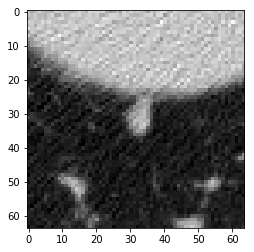

In [30]:
plt.figure()
plt.imshow(data[5]/255, cmap='gray')
print("Malignant", data_cvc[4])

# Sort images into train/validation/test directorys

In [65]:
train_set = data[:(len(data)//5)*4]
train_cvc = data_cvc[:(len(data_cvc)//5)*4]
             
val_set = data[(len(data)//5)*4:(len(data)//5)*4+(len(data)//5)//2]
val_cvc = data_cvc[(len(data)//5)*4:(len(data_cvc)//5)*4+(len(data_cvc)//5)//2]

test_set = data[(len(data)//5)*4+(len(data)//5)//2:]
test_cvc = data_cvc[(len(data_cvc)//5)*4+(len(data_cvc)//5)//2:]

In [18]:
print("train_set:",len(train_set))
print("val_set:", len(val_set))
print("test_set:", len(test_set))

train_set: 5352
val_set: 669
test_set: 670


In [101]:
os.getcwd()
path = os.getcwd() + "/data"
os.mkdir(path)

In [102]:
path = os.getcwd() + "/data" + "/malignant"
os.mkdir(path)

path = os.getcwd() + "/data" + "/nonmalignant"
os.mkdir(path)

In [103]:
path = os.getcwd() + "/data" + "/malignant" + "/test"
os.mkdir(path)

path = os.getcwd() + "/data" + "/malignant" + "/train"
os.mkdir(path)

path = os.getcwd() + "/data"+ "/malignant" + "/validation"
os.mkdir(path)

path = os.getcwd() + "/data" + "/nonmalignant" + "/test"
os.mkdir(path)

path = os.getcwd() + "/data"+ "/nonmalignant" + "/train"
os.mkdir(path)

path = os.getcwd() + "/data" + "/nonmalignant" + "/validation"
os.mkdir(path)

In [104]:
for idx, image in enumerate(train_set):
    if train_cvc[idx][1] == "0.0":
        imageio.imwrite("data/nonmalignant/train/" + str(idx) + ".jpg", train_set[idx])
    if train_cvc[idx][1] == "1.0":
        imageio.imwrite("data/malignant/train/" + str(idx) + ".jpg", train_set[idx])

for idx, image in enumerate(test_set):
    if test_cvc[idx][1] == "0.0":
        imageio.imwrite("data/nonmalignant/test/" + str(idx) + ".jpg", test_set[idx])
    if test_cvc[idx][1] == "1.0":
        imageio.imwrite("data/malignant/test/" + str(idx) + ".jpg", test_set[idx])
        
for idx, image in enumerate(val_set):
    if val_cvc[idx][1] == "0.0":
        imageio.imwrite("data/nonmalignant/validation/" + str(idx) + ".jpg", val_set[idx])
    if val_cvc[idx][1] == "1.0":
        imageio.imwrite("data/malignant/validation/" + str(idx) + ".jpg", val_set[idx])
        